In [135]:
from bs4 import BeautifulSoup
import requests

In [136]:
url = 'https://www.cdc.gov/tb/statistics/reports/2021/table1.htm'

page = requests.get(url)

soup = BeautifulSoup(page.text, 'html')

In [137]:
table = soup.find('table')

In [138]:
tuberculosis_titles = table.find_all('th')

In [139]:
tuberculosis_titles

[<th rowspan="3"><strong>Year</strong></th>,
 <th colspan="4"><strong>Tuberculosis cases</strong></th>,
 <th rowspan="3"></th>,
 <th colspan="4"><strong>Tuberculosis deaths<sup>1</sup></strong></th>,
 <th rowspan="2"><strong>No.</strong></th>,
 <th rowspan="2"><strong>Rate</strong></th>,
 <th colspan="2"><strong>Percentage change</strong></th>,
 <th rowspan="2"><strong>No.</strong></th>,
 <th rowspan="2"><strong>Rate</strong></th>,
 <th colspan="2"><strong>Percentage change<sup>2</sup></strong></th>,
 <th><strong>No.</strong></th>,
 <th><strong>Rate</strong></th>,
 <th><strong>No.</strong></th>,
 <th><strong>Rate</strong></th>]

In [140]:
tuberculosis_table_titles = [title.text.strip() for title in tuberculosis_titles]

print(tuberculosis_table_titles)

['Year', 'Tuberculosis cases', '', 'Tuberculosis deaths1', 'No.', 'Rate', 'Percentage change', 'No.', 'Rate', 'Percentage change2', 'No.', 'Rate', 'No.', 'Rate']


In [141]:
type(tuberculosis_table_titles)

list

In [142]:
filtered_titles = [title for title in tuberculosis_table_titles if title]

In [143]:
restructured_headers = ['Year', 'No.', 'Rate', 'Percentage change No.', 'Percentage change Rate']

In [144]:
type(restructured_headers)

list

In [145]:
tuberculosis_table_titles2 = pd.MultiIndex.from_arrays([
    ['Tuberculosis cases'] * len(restructured_headers) + ['Tuberculosis deaths'] * len(restructured_headers),
    restructured_headers * 2

])

In [146]:
import pandas as pd

In [147]:
df = pd.DataFrame(columns = tuberculosis_table_titles2)

df

Empty DataFrame
Columns: [(Tuberculosis cases, Year), (Tuberculosis cases, No.), (Tuberculosis cases, Rate), (Tuberculosis cases, Percentage change No.), (Tuberculosis cases, Percentage change Rate), (Tuberculosis deaths, Year), (Tuberculosis deaths, No.), (Tuberculosis deaths, Rate), (Tuberculosis deaths, Percentage change No.), (Tuberculosis deaths, Percentage change Rate)]
Index: []

In [148]:
column_data = table.find_all('tr')

In [149]:
for row in column_data[3:]:
    row_data = row.find_all('td')
    individual_row_data = [data.text.strip() for data in row_data]
    print(individual_row_data)

    length = len(df)
    df.loc[length] = individual_row_data

['2021', '7,882', '2.4', '9.9', '9.8', '', '––', '––', '––', '––']
['2020', '7,171', '2.2', '-19.4', '-20.2', '', '600', '0.2', '14.1', '13.0']
['2019', '8,898', '2.7', '-1.1', '-1.6', '', '526', '0.2', '-3.0', '-3.4']
['2018', '8,998', '2.8', '-0.8', '-1.3', '', '542', '0.2', '5.2', '4.7']
['2017', '9,069', '2.8', '-1.9', '-2.5', '', '515', '0.2', '-2.5', '-3.1']
['2016', '9,240', '2.9', '-3.1', '-3.8', '', '528', '0.2', '12.3', '11.5']
['2015', '9,538', '3.0', '1.7', '0.9', '', '470', '0.1', '-4.7', '-5.4']
['2014', '9,382', '2.9', '-1.6', '-2.4', '', '493', '0.2', '-11.2', '-11.8']
['2013', '9,539', '3.0', '-3.9', '-4.5', '', '555', '0.2', '8.8', '8.1']
['2012', '9,923', '3.2', '-5.3', '-6.0', '', '510', '0.2', '-5.4', '-6.1']
['2011', '10,474', '3.4', '-5.4', '-6.1', '', '539', '0.2', '-5.3', '-6.0']
['2010', '11,071', '3.6', '-3.7', '-4.5', '', '569', '0.2', '7.6', '6.7']
['2009', '11,494', '3.7', '-11.2', '-12.0', '', '529', '0.2', '-9.6', '-10.4']
['2008', '12,943', '4.3', '-2.5

In [150]:
df

Tuberculosis cases                                      \
                 Year     No.  Rate Percentage change No.   
0                2021   7,882   2.4                   9.9   
1                2020   7,171   2.2                 -19.4   
2                2019   8,898   2.7                  -1.1   
3                2018   8,998   2.8                  -0.8   
4                2017   9,069   2.8                  -1.9   
5                2016   9,240   2.9                  -3.1   
6                2015   9,538   3.0                   1.7   
7                2014   9,382   2.9                  -1.6   
8                2013   9,539   3.0                  -3.9   
9                2012   9,923   3.2                  -5.3   
10               2011  10,474   3.4                  -5.4   
11               2010  11,071   3.6                  -3.7   
12               2009  11,494   3.7                 -11.2   
13               2008  12,943   4.3                  -2.5   
14               2007  13,274   4.4                  -3.3   
15               2006  13,720   4.6                  -2.4   
16               2005  14,053   4.8                  -3.1   
17               2004  14,498   5.0                  -2.3   
18               2003  14,832   5.1                  -1.5   
19               2002  15,054   5.2                  -5.6   
20               2001  15,943   5.6                  -2.2   
21               2000  16,306   5.8                  -6.8   
22               1999  17,493   6.3                  -4.3   
23               1998  18,288   6.6                  -7.4   
24               1997  19,753   7.2                  -6.9   
25               1996  21,212   7.9                  -6.7   
26               1995  22,727   8.5                  -6.1   
27               1994  24,207   9.2                  -3.6   
28               1993  25,105   9.7                  -5.9   
29               1992  26,673  10.4                   1.5   
30               1991  26,283  10.4                   2.3   
31               1990  25,701  10.3                   9.4   
32               1989  23,495   9.5                   4.7   
33               1988  22,436   9.2                  -0.4   
34               1987  22,517   9.3                  -1.1   
35               1986  22,768   9.5                   2.6   
36               1985  22,201   9.3                  -0.2   
37               1984  22,255   9.4                  -6.7   
38               1983  23,846  10.2                  -6.6   
39               1982  25,520  11.0                  -6.8   
40               1981  27,373  11.9                  -1.4   
41               1980  27,749  12.2                   0.3   
42              19793  27,669  12.3                  -3.0   
43               1978  28,521  12.8                  -5.4   
44               1977  30,145  13.7                  -6.1   
45               1976  32,105  14.7                  -5.5   
46               1975  33,989  15.7                    ––   
47              19744  30,122  14.1                  -2.8   
48               1973  30,998  14.6                  -5.7   
49               1972  32,882  15.7                  -6.6   
50               1971  35,217  17.0                  -5.2   
51               1970  37,137  18.1                  -5.1   
52               1969  39,120  19.3                  -8.2   
53               1968  42,623  21.2                  -6.6   
54               1967  45,647  23.0                  -4.4   
55               1966  47,767  24.3                  -2.5   
56               1965  49,016  25.2                  -3.7   
57               1964  50,874  26.5                  -5.9   
58               1963  54,042  28.6                   1.4   
59               1962  53,315  28.6                  -0.8   
60               1961  53,726  29.2                  -3.2   
61               1960  55,494  30.7                  -3.5   
62               1959  57,535  32.4                  -9.4   
63               1958  63,534  36.3   

In [151]:
df.to_csv(r'C:\Users\Jamal\OneDrive\Desktop\Data Analyst Role\Tuberculosis.csv', index=False)

In [152]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
df

Tuberculosis cases                                      \
                 Year     No.  Rate Percentage change No.   
0                2021   7,882   2.4                   9.9   
1                2020   7,171   2.2                 -19.4   
2                2019   8,898   2.7                  -1.1   
3                2018   8,998   2.8                  -0.8   
4                2017   9,069   2.8                  -1.9   
5                2016   9,240   2.9                  -3.1   
6                2015   9,538   3.0                   1.7   
7                2014   9,382   2.9                  -1.6   
8                2013   9,539   3.0                  -3.9   
9                2012   9,923   3.2                  -5.3   
10               2011  10,474   3.4                  -5.4   
11               2010  11,071   3.6                  -3.7   
12               2009  11,494   3.7                 -11.2   
13               2008  12,943   4.3                  -2.5   
14               2007  13,274   4.4                  -3.3   
15               2006  13,720   4.6                  -2.4   
16               2005  14,053   4.8                  -3.1   
17               2004  14,498   5.0                  -2.3   
18               2003  14,832   5.1                  -1.5   
19               2002  15,054   5.2                  -5.6   
20               2001  15,943   5.6                  -2.2   
21               2000  16,306   5.8                  -6.8   
22               1999  17,493   6.3                  -4.3   
23               1998  18,288   6.6                  -7.4   
24               1997  19,753   7.2                  -6.9   
25               1996  21,212   7.9                  -6.7   
26               1995  22,727   8.5                  -6.1   
27               1994  24,207   9.2                  -3.6   
28               1993  25,105   9.7                  -5.9   
29               1992  26,673  10.4                   1.5   
30               1991  26,283  10.4                   2.3   
31               1990  25,701  10.3                   9.4   
32               1989  23,495   9.5                   4.7   
33               1988  22,436   9.2                  -0.4   
34               1987  22,517   9.3                  -1.1   
35               1986  22,768   9.5                   2.6   
36               1985  22,201   9.3                  -0.2   
37               1984  22,255   9.4                  -6.7   
38               1983  23,846  10.2                  -6.6   
39               1982  25,520  11.0                  -6.8   
40               1981  27,373  11.9                  -1.4   
41               1980  27,749  12.2                   0.3   
42              19793  27,669  12.3                  -3.0   
43               1978  28,521  12.8                  -5.4   
44               1977  30,145  13.7                  -6.1   
45               1976  32,105  14.7                  -5.5   
46               1975  33,989  15.7                    ––   
47              19744  30,122  14.1                  -2.8   
48               1973  30,998  14.6                  -5.7   
49               1972  32,882  15.7                  -6.6   
50               1971  35,217  17.0                  -5.2   
51               1970  37,137  18.1                  -5.1   
52               1969  39,120  19.3                  -8.2   
53               1968  42,623  21.2                  -6.6   
54               1967  45,647  23.0                  -4.4   
55               1966  47,767  24.3                  -2.5   
56               1965  49,016  25.2                  -3.7   
57               1964  50,874  26.5                  -5.9   
58               1963  54,042  28.6                   1.4   
59               1962  53,315  28.6                  -0.8   
60               1961  53,726  29.2                  -3.2   
61               1960  55,494  30.7                  -3.5   
62               1959  57,535  32.4                  -9.4   
63               1958  63,534  36.3   

In [153]:
df = df.drop_duplicates()

In [154]:
df

Tuberculosis cases                                      \
                 Year     No.  Rate Percentage change No.   
0                2021   7,882   2.4                   9.9   
1                2020   7,171   2.2                 -19.4   
2                2019   8,898   2.7                  -1.1   
3                2018   8,998   2.8                  -0.8   
4                2017   9,069   2.8                  -1.9   
5                2016   9,240   2.9                  -3.1   
6                2015   9,538   3.0                   1.7   
7                2014   9,382   2.9                  -1.6   
8                2013   9,539   3.0                  -3.9   
9                2012   9,923   3.2                  -5.3   
10               2011  10,474   3.4                  -5.4   
11               2010  11,071   3.6                  -3.7   
12               2009  11,494   3.7                 -11.2   
13               2008  12,943   4.3                  -2.5   
14               2007  13,274   4.4                  -3.3   
15               2006  13,720   4.6                  -2.4   
16               2005  14,053   4.8                  -3.1   
17               2004  14,498   5.0                  -2.3   
18               2003  14,832   5.1                  -1.5   
19               2002  15,054   5.2                  -5.6   
20               2001  15,943   5.6                  -2.2   
21               2000  16,306   5.8                  -6.8   
22               1999  17,493   6.3                  -4.3   
23               1998  18,288   6.6                  -7.4   
24               1997  19,753   7.2                  -6.9   
25               1996  21,212   7.9                  -6.7   
26               1995  22,727   8.5                  -6.1   
27               1994  24,207   9.2                  -3.6   
28               1993  25,105   9.7                  -5.9   
29               1992  26,673  10.4                   1.5   
30               1991  26,283  10.4                   2.3   
31               1990  25,701  10.3                   9.4   
32               1989  23,495   9.5                   4.7   
33               1988  22,436   9.2                  -0.4   
34               1987  22,517   9.3                  -1.1   
35               1986  22,768   9.5                   2.6   
36               1985  22,201   9.3                  -0.2   
37               1984  22,255   9.4                  -6.7   
38               1983  23,846  10.2                  -6.6   
39               1982  25,520  11.0                  -6.8   
40               1981  27,373  11.9                  -1.4   
41               1980  27,749  12.2                   0.3   
42              19793  27,669  12.3                  -3.0   
43               1978  28,521  12.8                  -5.4   
44               1977  30,145  13.7                  -6.1   
45               1976  32,105  14.7                  -5.5   
46               1975  33,989  15.7                    ––   
47              19744  30,122  14.1                  -2.8   
48               1973  30,998  14.6                  -5.7   
49               1972  32,882  15.7                  -6.6   
50               1971  35,217  17.0                  -5.2   
51               1970  37,137  18.1                  -5.1   
52               1969  39,120  19.3                  -8.2   
53               1968  42,623  21.2                  -6.6   
54               1967  45,647  23.0                  -4.4   
55               1966  47,767  24.3                  -2.5   
56               1965  49,016  25.2                  -3.7   
57               1964  50,874  26.5                  -5.9   
58               1963  54,042  28.6                   1.4   
59               1962  53,315  28.6                  -0.8   
60               1961  53,726  29.2                  -3.2   
61               1960  55,494  30.7                  -3.5   
62               1959  57,535  32.4                  -9.4   
63               1958  63,534  36.3   

In [164]:
df.replace('––', float('nan'), inplace=True)

In [165]:
df.replace(',', '', regex=True, inplace=True)

df = df.astype({
    ('Tuberculosis cases', 'Year'): int,
    ('Tuberculosis cases', 'No.'): float,
    ('Tuberculosis deaths', 'No.'): float,
    ('Tuberculosis cases', 'Rate'): float,
    ('Tuberculosis deaths', 'Rate'): float
})

In [166]:
df

Tuberculosis cases                                       \
                 Year      No.  Rate Percentage change No.   
0                2021   7882.0   2.4                   9.9   
1                2020   7171.0   2.2                 -19.4   
2                2019   8898.0   2.7                  -1.1   
3                2018   8998.0   2.8                  -0.8   
4                2017   9069.0   2.8                  -1.9   
5                2016   9240.0   2.9                  -3.1   
6                2015   9538.0   3.0                   1.7   
7                2014   9382.0   2.9                  -1.6   
8                2013   9539.0   3.0                  -3.9   
9                2012   9923.0   3.2                  -5.3   
10               2011  10474.0   3.4                  -5.4   
11               2010  11071.0   3.6                  -3.7   
12               2009  11494.0   3.7                 -11.2   
13               2008  12943.0   4.3                  -2.5   
14               2007  13274.0   4.4                  -3.3   
15               2006  13720.0   4.6                  -2.4   
16               2005  14053.0   4.8                  -3.1   
17               2004  14498.0   5.0                  -2.3   
18               2003  14832.0   5.1                  -1.5   
19               2002  15054.0   5.2                  -5.6   
20               2001  15943.0   5.6                  -2.2   
21               2000  16306.0   5.8                  -6.8   
22               1999  17493.0   6.3                  -4.3   
23               1998  18288.0   6.6                  -7.4   
24               1997  19753.0   7.2                  -6.9   
25               1996  21212.0   7.9                  -6.7   
26               1995  22727.0   8.5                  -6.1   
27               1994  24207.0   9.2                  -3.6   
28               1993  25105.0   9.7                  -5.9   
29               1992  26673.0  10.4                   1.5   
30               1991  26283.0  10.4                   2.3   
31               1990  25701.0  10.3                   9.4   
32               1989  23495.0   9.5                   4.7   
33               1988  22436.0   9.2                  -0.4   
34               1987  22517.0   9.3                  -1.1   
35               1986  22768.0   9.5                   2.6   
36               1985  22201.0   9.3                  -0.2   
37               1984  22255.0   9.4                  -6.7   
38               1983  23846.0  10.2                  -6.6   
39               1982  25520.0  11.0                  -6.8   
40               1981  27373.0  11.9                  -1.4   
41               1980  27749.0  12.2                   0.3   
42              19793  27669.0  12.3                  -3.0   
43               1978  28521.0  12.8                  -5.4   
44               1977  30145.0  13.7                  -6.1   
45               1976  32105.0  14.7                  -5.5   
46               1975  33989.0  15.7                   NaN   
47              19744  30122.0  14.1                  -2.8   
48               1973  30998.0  14.6                  -5.7   
49               1972  32882.0  15.7                  -6.6   
50               1971  35217.0  17.0                  -5.2   
51               1970  37137.0  18.1                  -5.1   
52               1969  39120.0  19.3                  -8.2   
53               1968  42623.0  21.2                  -6.6   
54               1967  45647.0  23.0                  -4.4   
55               1966  47767.0  24.3                  -2.5   
56               1965  49016.0  25.2                  -3.7   
57               1964  50874.0  26.5                  -5.9   
58               1963  54042.0  28.6                   1.4   
59               1962  53315.0  28.6                  -0.8   
60               1961  53726.0  29.2                  -3.2   
61               1960  55494.0  30.7                  -3.5   
62               1959  57535.0  32.

In [168]:
df.isnull().sum()

Tuberculosis cases   Year                      0
                     No.                       0
                     Rate                      0
                     Percentage change No.     2
                     Percentage change Rate    2
Tuberculosis deaths  Year                      0
                     No.                       1
                     Rate                      1
                     Percentage change No.     2
                     Percentage change Rate    2
dtype: int64

In [169]:
df = df.drop([('Tuberculosis deaths', 'Year')], axis=1)

In [170]:
from scipy import stats
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter
import numpy as np

In [171]:
print(df.dtypes)

Tuberculosis cases   Year                        int32
                     No.                       float64
                     Rate                      float64
                     Percentage change No.      object
                     Percentage change Rate     object
Tuberculosis deaths  No.                       float64
                     Rate                      float64
                     Percentage change No.      object
                     Percentage change Rate     object
dtype: object


In [172]:
df

Tuberculosis cases                                       \
                 Year      No.  Rate Percentage change No.   
0                2021   7882.0   2.4                   9.9   
1                2020   7171.0   2.2                 -19.4   
2                2019   8898.0   2.7                  -1.1   
3                2018   8998.0   2.8                  -0.8   
4                2017   9069.0   2.8                  -1.9   
5                2016   9240.0   2.9                  -3.1   
6                2015   9538.0   3.0                   1.7   
7                2014   9382.0   2.9                  -1.6   
8                2013   9539.0   3.0                  -3.9   
9                2012   9923.0   3.2                  -5.3   
10               2011  10474.0   3.4                  -5.4   
11               2010  11071.0   3.6                  -3.7   
12               2009  11494.0   3.7                 -11.2   
13               2008  12943.0   4.3                  -2.5   
14               2007  13274.0   4.4                  -3.3   
15               2006  13720.0   4.6                  -2.4   
16               2005  14053.0   4.8                  -3.1   
17               2004  14498.0   5.0                  -2.3   
18               2003  14832.0   5.1                  -1.5   
19               2002  15054.0   5.2                  -5.6   
20               2001  15943.0   5.6                  -2.2   
21               2000  16306.0   5.8                  -6.8   
22               1999  17493.0   6.3                  -4.3   
23               1998  18288.0   6.6                  -7.4   
24               1997  19753.0   7.2                  -6.9   
25               1996  21212.0   7.9                  -6.7   
26               1995  22727.0   8.5                  -6.1   
27               1994  24207.0   9.2                  -3.6   
28               1993  25105.0   9.7                  -5.9   
29               1992  26673.0  10.4                   1.5   
30               1991  26283.0  10.4                   2.3   
31               1990  25701.0  10.3                   9.4   
32               1989  23495.0   9.5                   4.7   
33               1988  22436.0   9.2                  -0.4   
34               1987  22517.0   9.3                  -1.1   
35               1986  22768.0   9.5                   2.6   
36               1985  22201.0   9.3                  -0.2   
37               1984  22255.0   9.4                  -6.7   
38               1983  23846.0  10.2                  -6.6   
39               1982  25520.0  11.0                  -6.8   
40               1981  27373.0  11.9                  -1.4   
41               1980  27749.0  12.2                   0.3   
42              19793  27669.0  12.3                  -3.0   
43               1978  28521.0  12.8                  -5.4   
44               1977  30145.0  13.7                  -6.1   
45               1976  32105.0  14.7                  -5.5   
46               1975  33989.0  15.7                   NaN   
47              19744  30122.0  14.1                  -2.8   
48               1973  30998.0  14.6                  -5.7   
49               1972  32882.0  15.7                  -6.6   
50               1971  35217.0  17.0                  -5.2   
51               1970  37137.0  18.1                  -5.1   
52               1969  39120.0  19.3                  -8.2   
53               1968  42623.0  21.2                  -6.6   
54               1967  45647.0  23.0                  -4.4   
55               1966  47767.0  24.3                  -2.5   
56               1965  49016.0  25.2                  -3.7   
57               1964  50874.0  26.5                  -5.9   
58               1963  54042.0  28.6                   1.4   
59               1962  53315.0  28.6                  -0.8   
60               1961  53726.0  29.2                  -3.2   
61               1960  55494.0  30.7                  -3.5   
62               1959  57535.0  32.

In [176]:
df["Tuberculosis cases",'Year'].replace({19793: 1979, 19744: 1974}, inplace=True)

In [181]:
df.sort_values(by=[("Tuberculosis cases", "Year")])

Tuberculosis cases                                       \
                 Year      No.  Rate Percentage change No.   
68               1953  84304.0  52.6                   NaN   
67               1954  79775.0  48.9                  -5.4   
66               1955  77368.0  46.6                  -3.0   
65               1956  69895.0  41.4                  -9.7   
64               1957  67149.0  39.0                  -3.9   
63               1958  63534.0  36.3                  -5.4   
62               1959  57535.0  32.4                  -9.4   
61               1960  55494.0  30.7                  -3.5   
60               1961  53726.0  29.2                  -3.2   
59               1962  53315.0  28.6                  -0.8   
58               1963  54042.0  28.6                   1.4   
57               1964  50874.0  26.5                  -5.9   
56               1965  49016.0  25.2                  -3.7   
55               1966  47767.0  24.3                  -2.5   
54               1967  45647.0  23.0                  -4.4   
53               1968  42623.0  21.2                  -6.6   
52               1969  39120.0  19.3                  -8.2   
51               1970  37137.0  18.1                  -5.1   
50               1971  35217.0  17.0                  -5.2   
49               1972  32882.0  15.7                  -6.6   
48               1973  30998.0  14.6                  -5.7   
47               1974  30122.0  14.1                  -2.8   
46               1975  33989.0  15.7                   NaN   
45               1976  32105.0  14.7                  -5.5   
44               1977  30145.0  13.7                  -6.1   
43               1978  28521.0  12.8                  -5.4   
42               1979  27669.0  12.3                  -3.0   
41               1980  27749.0  12.2                   0.3   
40               1981  27373.0  11.9                  -1.4   
39               1982  25520.0  11.0                  -6.8   
38               1983  23846.0  10.2                  -6.6   
37               1984  22255.0   9.4                  -6.7   
36               1985  22201.0   9.3                  -0.2   
35               1986  22768.0   9.5                   2.6   
34               1987  22517.0   9.3                  -1.1   
33               1988  22436.0   9.2                  -0.4   
32               1989  23495.0   9.5                   4.7   
31               1990  25701.0  10.3                   9.4   
30               1991  26283.0  10.4                   2.3   
29               1992  26673.0  10.4                   1.5   
28               1993  25105.0   9.7                  -5.9   
27               1994  24207.0   9.2                  -3.6   
26               1995  22727.0   8.5                  -6.1   
25               1996  21212.0   7.9                  -6.7   
24               1997  19753.0   7.2                  -6.9   
23               1998  18288.0   6.6                  -7.4   
22               1999  17493.0   6.3                  -4.3   
21               2000  16306.0   5.8                  -6.8   
20               2001  15943.0   5.6                  -2.2   
19               2002  15054.0   5.2                  -5.6   
18               2003  14832.0   5.1                  -1.5   
17               2004  14498.0   5.0                  -2.3   
16               2005  14053.0   4.8                  -3.1   
15               2006  13720.0   4.6                  -2.4   
14               2007  13274.0   4.4                  -3.3   
13               2008  12943.0   4.3                  -2.5   
12               2009  11494.0   3.7                 -11.2   
11               2010  11071.0   3.6                  -3.7   
10               2011  10474.0   3.4                  -5.4   
9                2012   9923.0   3.2                  -5.3   
8                2013   9539.0   3.0                  -3.9   
7                2014   9382.0   2.9                  -1.6   
6                2015   9538.0   3.

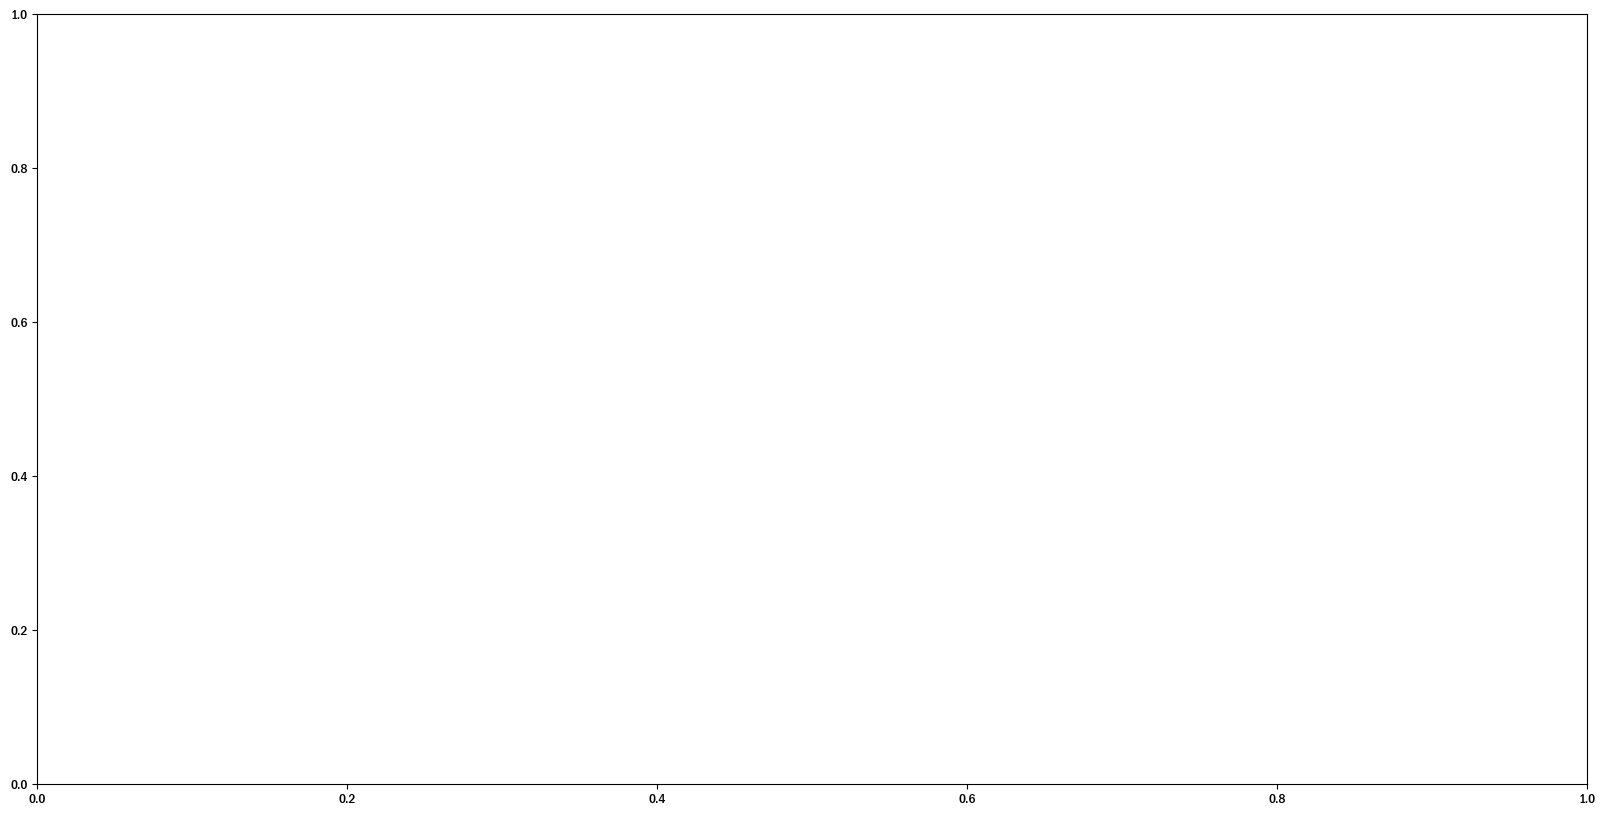

In [214]:
#Set default font of the graph
plt.rcParams['font.family'] = 'Franklin Gothic Medium Cond'


# Creating Figure.
fig, ax1 = plt.subplots(figsize=(20,10))

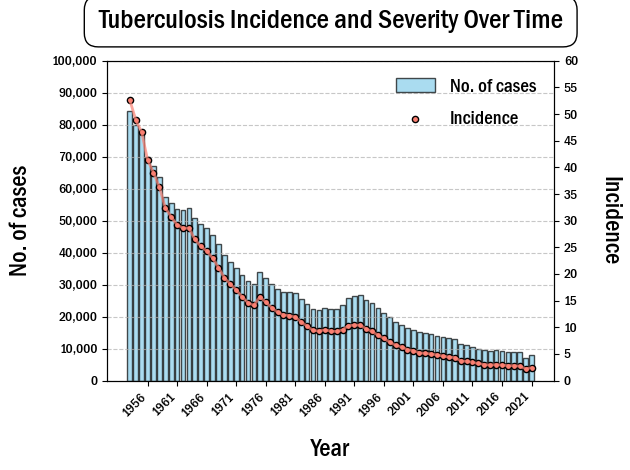

In [253]:
import matplotlib.pyplot as plt

# Create a figure and axes
fig, ax1 = plt.subplots()

# Plot No. of cases
ax1.bar(df[('Tuberculosis cases', 'Year')], df[('Tuberculosis cases', 'No.')], color='skyblue', alpha=0.7, edgecolor='black', label='No. of cases')
ax1.set_xlabel('Year', fontsize=18, labelpad=15)
ax1.set_ylabel('No. of cases', color='black', fontsize=18, labelpad=15)
ax1.tick_params('y', colors='black')
ax1.grid(axis='y', linestyle='--', alpha=0.7)

# Setting the y-axis limits for ax1
ax1_yticks = list(range(0, int(max(df[('Tuberculosis cases', 'No.')])) + 20001, 10000))
ax1.set_yticks(ax1_yticks)
ax1.set_ylim(0, 100000)
ax1.yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))

# Create a second axis for rate per 100,000 (Incidence)
ax2 = ax1.twinx()
ax2.scatter(df[('Tuberculosis cases', 'Year')], df[('Tuberculosis cases', 'Rate')], color='salmon', marker='o', edgecolor='black', label='Incidence', s=20)
ax2.plot(df[('Tuberculosis cases', 'Year')], df[('Tuberculosis cases', 'Rate')], color='salmon', linestyle='-', linewidth=2, alpha=0.7, markeredgecolor='black')
ax2.set_ylabel('Incidence', color='black', fontsize=18, rotation=270, labelpad=15, va='bottom')
ax2.tick_params('y', colors='black')

# Setting y-axis limits for ax2
ax2_yticks = list(range(0, 61, 5))
ax2.set_yticks(ax2_yticks)
ax2.set_ylim(0, 60)

# Setting x-axis labels
ax1.set_xticks(df[('Tuberculosis cases', 'Year')][::5])
ax1.set_xticklabels(df[('Tuberculosis cases', 'Year')][::5], rotation=45, ha='right')
ax2.set_xticks(df[('Tuberculosis cases', 'Year')][::5])
ax2.set_xticklabels(df[('Tuberculosis cases', 'Year')][::5], rotation=45, ha='right')


# Creating Title & Legend for Graph
plt.title('Tuberculosis Incidence and Severity Over Time', fontsize=20, pad=20, fontweight='bold', va='bottom', color='black', style='italic', bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5'))
ax1.legend = ax1.legend(loc='upper right', fontsize=14, frameon=False)
ax2.legend = ax2.legend(loc='upper right', fontsize=14, frameon=False, bbox_to_anchor=(0.96, 0.9))

# Adjusting layout for plot for better spacing & Displaying plot
fig.tight_layout()
plt.show()
